# $H-$band spot check with `muler` and `gollum`

We don't have high resolution $H-$band cloudy models.  But we do have gollum and muler interfaces to the cloud-free models.  Let's look!

In [1]:
%config InlineBackend.figure_format='retina'

In [2]:
from muler.igrins import IGRINSSpectrum, IGRINSSpectrumList
from gollum.sonora import SonoraGrid
import glob
import matplotlib.pyplot as plt

In [3]:
fns = sorted(glob.glob('../../data/IGRINS/originals/GS-2021A-DD-104/**/**/SDCK*spec_a0v.fits'))

In [4]:
fns

['../../data/IGRINS/originals/GS-2021A-DD-104/20210311/reduced/SDCK_20210311_0021.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210311/reduced/SDCK_20210311_0025.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210312/reduced/SDCK_20210312_0090.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210312/reduced/SDCK_20210312_0094.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210313/reduced/SDCK_20210313_0021.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210313/reduced/SDCK_20210313_0025.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210317/reduced/SDCK_20210317_0051.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210317/reduced/SDCK_20210317_0053.spec_a0v.fits']

Component `A` is always observed first, then component `B`.

In [5]:
fns_A = fns[slice(0,8, 2)]
fns_B = fns[slice(1,8, 2)]

In [6]:
specs_A = [IGRINSSpectrumList.read(fn) for fn in fns_A]
specs_B = [IGRINSSpectrumList.read(fn) for fn in fns_B]

In [7]:
fns_A

['../../data/IGRINS/originals/GS-2021A-DD-104/20210311/reduced/SDCK_20210311_0021.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210312/reduced/SDCK_20210312_0090.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210313/reduced/SDCK_20210313_0021.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210317/reduced/SDCK_20210317_0051.spec_a0v.fits']

In [8]:
fns_B

['../../data/IGRINS/originals/GS-2021A-DD-104/20210311/reduced/SDCK_20210311_0025.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210312/reduced/SDCK_20210312_0094.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210313/reduced/SDCK_20210313_0025.spec_a0v.fits',
 '../../data/IGRINS/originals/GS-2021A-DD-104/20210317/reduced/SDCK_20210317_0053.spec_a0v.fits']

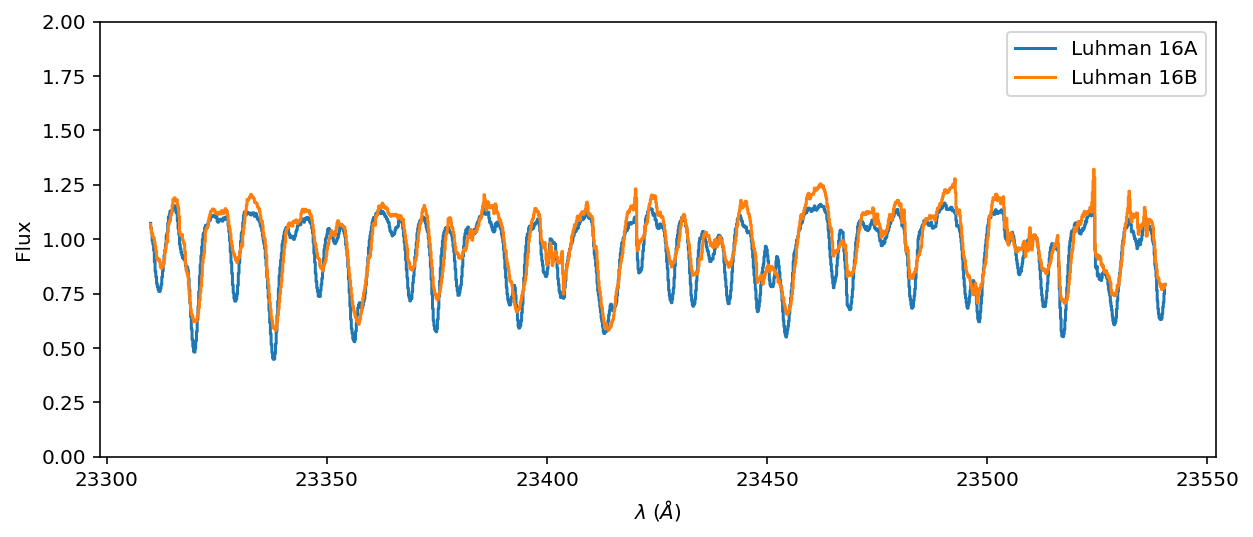

In [9]:
night = 0 #0,1,2,3
m = 5
spec_A = specs_A[night][m]
spec_B = specs_B[night][m]

ax = spec_A.trim_edges().remove_nans().normalize().plot(label='Luhman 16A', ylo=0, yhi=2);
spec_B.trim_edges().remove_nans().normalize().plot(ax=ax, label='Luhman 16B');
plt.legend();

In [10]:
%matplotlib notebook 

In [11]:
from gollum.telluric import TelluricSpectrum
import astropy.units as u

In [31]:
m = 14
spectra = specs_A
night1 = spectra[0][m]
night2 = spectra[1][m]
night3 = spectra[2][m]
night4 = spectra[3][m]

In [32]:
data = night3.trim_edges().remove_nans().normalize()

wl_lo, wl_hi = data.wavelength.value.min(), data.wavelength.value.max()

In [33]:
tell_spec = TelluricSpectrum(
                    path="default", wl_lo=wl_lo, wl_hi=wl_hi
                )

In [34]:
for night in [night1,  night2, night3, night4]:
    print(night.estimate_barycorr().to(u.km/u.s))

7.3743428087369125 km / s
6.896823509070229 km / s
6.771297900845235 km / s
5.362203408624152 km / s


<IPython.core.display.Javascript object>


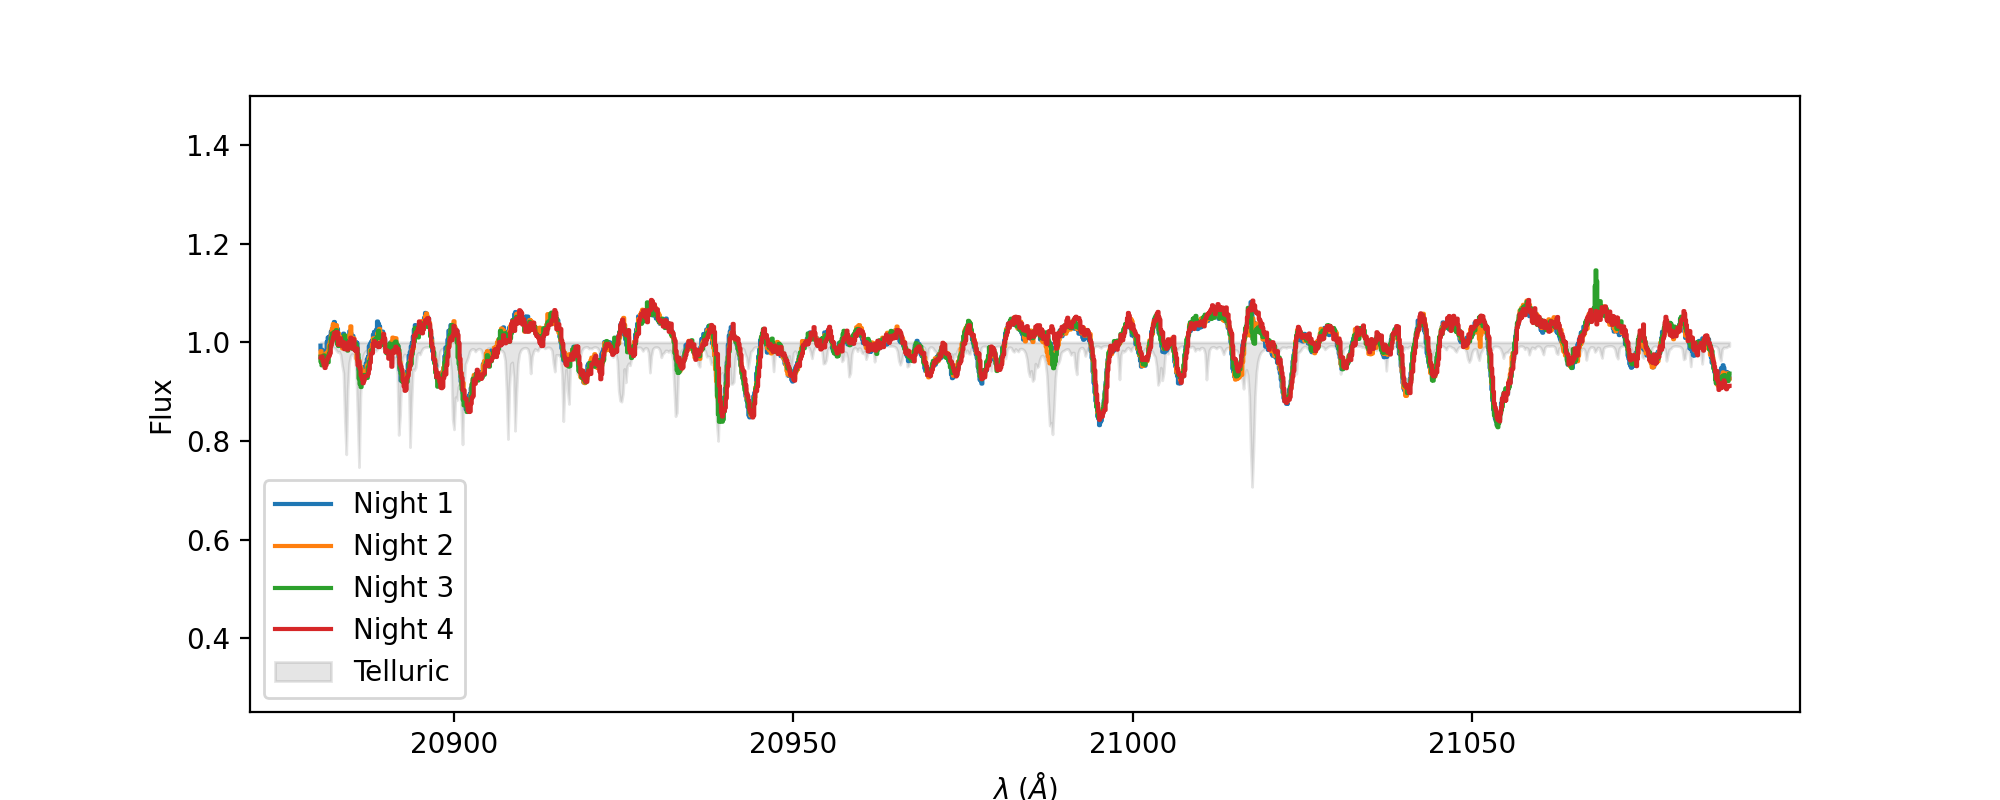

In [35]:
ax = night1.trim_edges().remove_nans().normalize().normalize().plot(label='Night 1', ylo=0.25, yhi=1.5);
night2.trim_edges().remove_nans().normalize().normalize().plot(ax=ax, label='Night 2');
night3.trim_edges().remove_nans().normalize().normalize().plot(ax=ax, label='Night 3');
night4.trim_edges().remove_nans().normalize().normalize().plot(ax=ax, label='Night 4');

plt.fill_between(tell_spec.wavelength, tell_spec.flux, 1, color='k', alpha=0.1, label='Telluric')

#plt.title('Luhman 16A')
plt.legend();

<IPython.core.display.Javascript object>


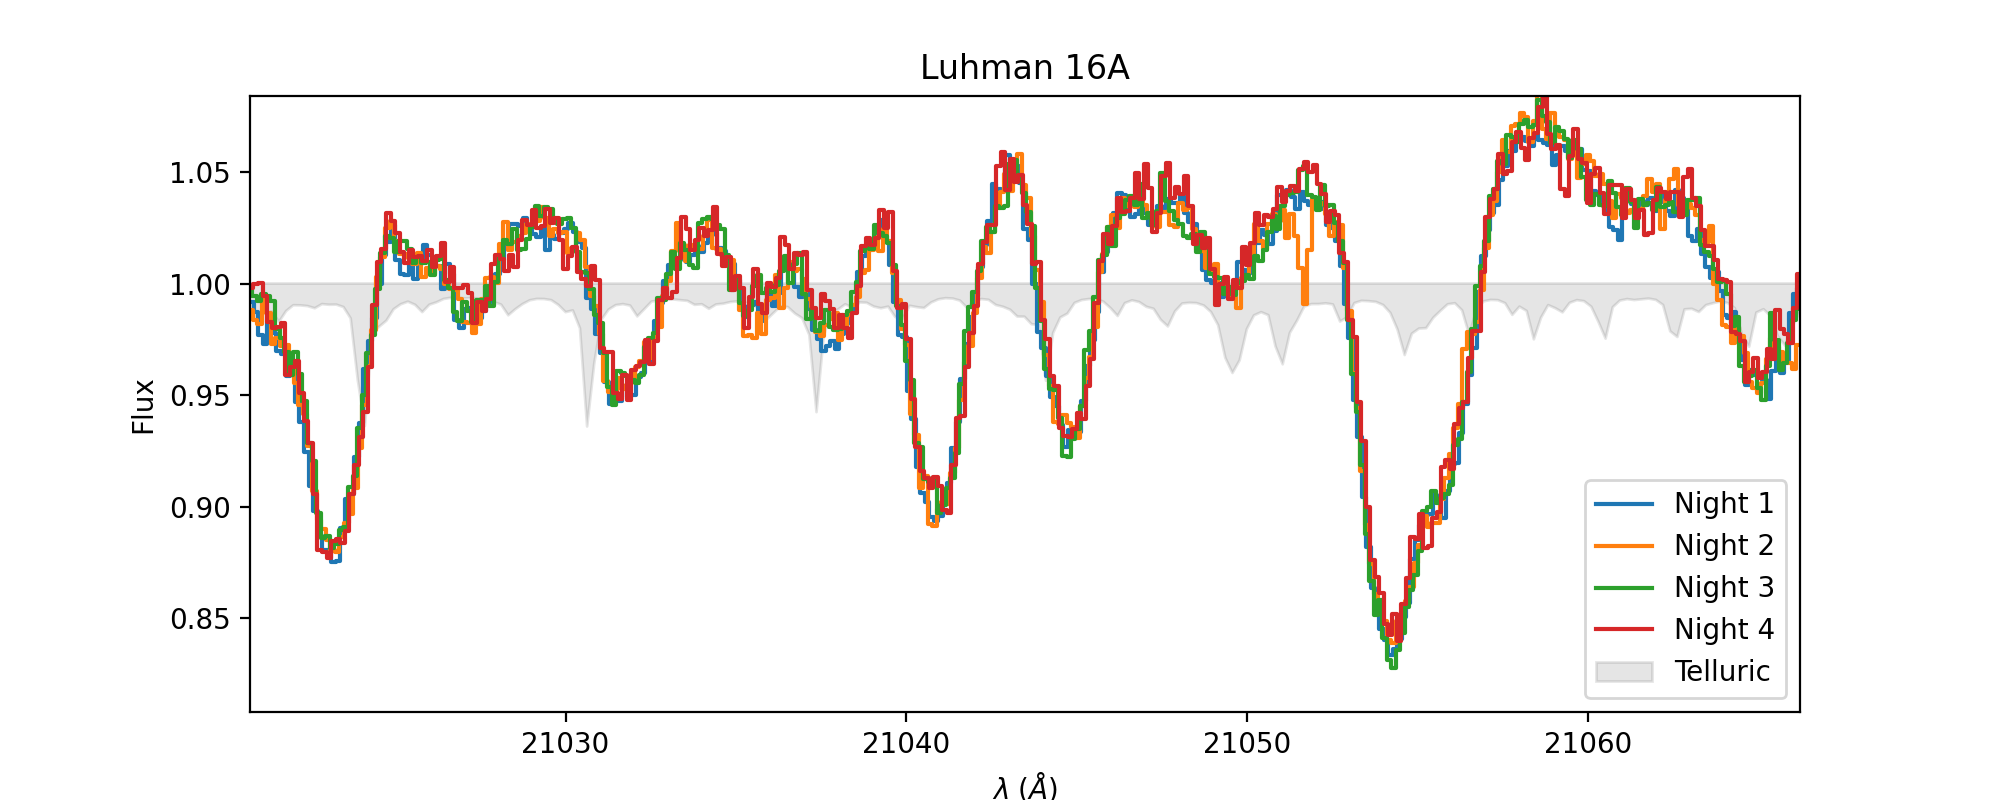

In [37]:
ax = night1.trim_edges().remove_nans().normalize().barycentric_correct().plot(label='Night 1', ylo=0.25, yhi=1.5);
night2.trim_edges().remove_nans().normalize().barycentric_correct().plot(ax=ax, label='Night 2');
night3.trim_edges().remove_nans().normalize().barycentric_correct().plot(ax=ax, label='Night 3');
night4.trim_edges().remove_nans().normalize().barycentric_correct().plot(ax=ax, label='Night 4');

plt.fill_between(tell_spec.wavelength, tell_spec.flux, 1, color='k', alpha=0.1, label='Telluric')

plt.title('Luhman 16A')
plt.legend();

In [24]:
grid = SonoraGrid(teff_range=(1000, 1600), wl_lo=wl_lo, wl_hi=wl_hi)

Processing Teff=1600 K, logg=5.50: 100%|██████████████████████████████████| 7/7 [00:05<00:00,  1.29it/s]


In [19]:
grid.show_dashboard(data=data)